In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")
%matplotlib inline


In [233]:
#Load in our data

df = pd.read_csv('./Forbes Richest Athletes (Forbes Richest Athletes 1990-2021).csv')

In [234]:
df.shape

(1659, 5)

In [235]:
# View few random rows in dataset

df.sample(15)

,Name,Nationality,Earnings,Year,Sport
927,LeBron James,USA,86.2,2017,Basketball
153,Barry Zito,USA,20.4,2014,Baseball
1203,Novak Djokovic,Serbia,44.6,2020,Tennis
303,Cole Hamels,USA,22.7,2016,Baseball
136,Arnold Palmer,USA,14.1,1995,Golf
1422,Samuel Etoo,Spain,16.4,2013,Soccer
17,Al Horford,Dominican Republic,24.4,2020,Basketball
1561,Trent Williams,USA,43.5,2021,Football
445,Diego Maradona,Argentina,5.0,1990,Soccer
528,Fernando Alonso,Spain,36.0,2017,Racing


In [236]:
# Check for missing values
df.isna().count()

Name           1659
Nationality    1659
Earnings       1659
Year           1659
Sport          1659
dtype: int64

In [237]:
# This tells us that there are 44 countries represented in the dataframe
len(df['Nationality'].unique())

44

In [238]:
# Let's see all the sports in the df
df['Sport'].unique()

array(['Football', 'Golf', 'Baseball', 'Basketball', 'Racing', 'Soccer',
       'Tennis', 'Boxing', 'Hockey', 'Mixed Martial Arts', 'MMA',
       'Football/Baseball', 'Cycling', 'Cricket', 'Track'], dtype=object)

The data here seems okay, except that MMA and Mixed Martial Arts are the same thing, so we'll have to clean that up.\

Also, what's *"Football/Baseball"*? That's perculiar. Let's take a closer look...

In [239]:
df[df['Sport']=='Football/Baseball']

,Name,Nationality,Earnings,Year,Sport
402,Deion Sanders,USA,11.5,1998,Football/Baseball
403,Deion Sanders,USA,22.5,1995,Football/Baseball
404,Deion Sanders,USA,4.9,1994,Football/Baseball


Alright, so I did a smigde of Googling and it turns out this Deion Sanders bloke actually played both these sports professionally. That's crazy! He's also the only person to ever do that.

That said, we'll be considering him as a Football athlete, because his career as a football player came first AND lasted the longest AND generated most money, according to this [source](https://woodgram.com/deion-sanders/)

In [263]:
# Cleaning up the necesary sports names

df['Sport'].replace('Football/Baseball', 'Football', inplace=True)
df['Sport'].replace('Mixed Martial Arts', 'MMA', inplace=True)

print('Football/Baseball:', df[df['Sport']=='Football/Baseball'])
print()
print('Mixed Martial Arts :', df[df['Sport']=='Mixed Martial Arts'])


Football/Baseball: Empty DataFrame
Columns: [Name, Nationality, Earnings, Year, Sport]
Index: []

Mixed Martial Arts : Empty DataFrame
Columns: [Name, Nationality, Earnings, Year, Sport]
Index: []


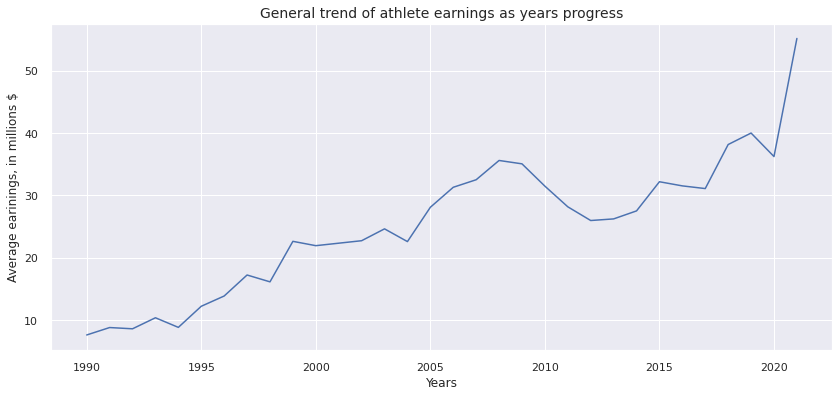

In [289]:
# A general overview of the earning trend in the dataset. Predictably, earinings increase over time. 
df_gen = df.groupby(['Year']).mean()
fig, ax = plt.subplots(figsize=(14, 6))
ax = plt.plot(df_gen.index, df_gen.Earnings)
plt.xlabel('Years')
plt.ylabel('Average earinings, in millions $')
plt.title('General trend of athlete earnings as years progress', fontdict={'size':14})
plt.show()

In [242]:
# Top 10 Cumulative earnings, grouped by country

top_countries = df[['Earnings', 'Nationality']].groupby('Nationality')\
.sum().sort_values('Earnings', ascending=False).head(10)

top_countries

,Earnings
Nationality,
USA,29622.2
UK,2173.3
Argentina,1145.1
Germany,1106.5
Brazil,1030.2
Spain,1011.7
Switzerland,981.2
Portugal,942.9
Venezuela,495.3


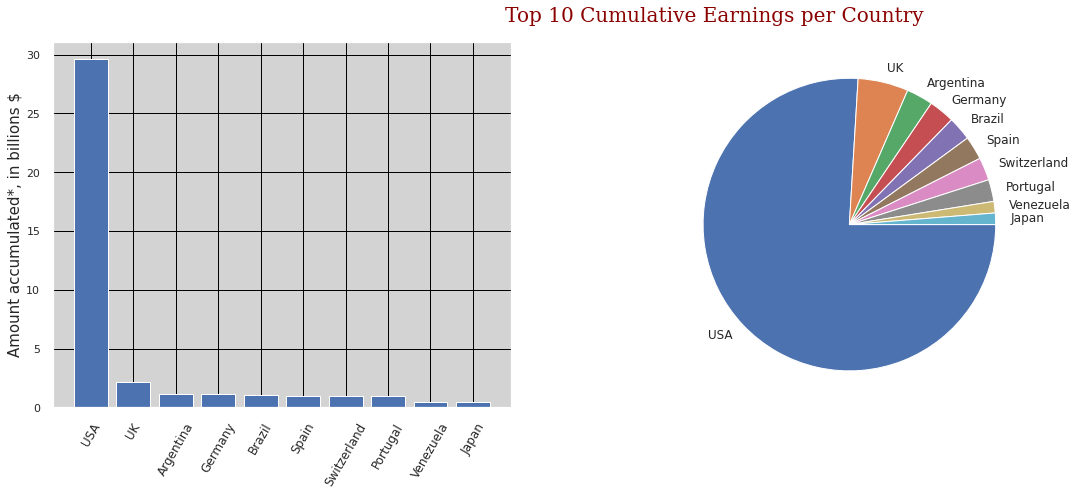

In [302]:
# Visualize top_countries

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7), gridspec_kw={'width_ratios': [1, 2.5]})
fig.tight_layout(pad=2)

font = {'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 20}
fig.suptitle('Top 10 Cumulative Earnings per Country',
            fontsize=20,
            color='darkred',
            family= 'serif')

# Juxtapose countries via bar graph
ax1.bar(top_countries.index, 
        top_countries['Earnings'].apply(lambda x: x/1000))
ax1.set_xticklabels(top_countries.index, rotation=60, size=12)
ax1.grid(color="black")
ax1.set_facecolor('lightgrey')
ax1.set_ylabel('Amount accumulated*, in billions $', fontdict={'size': 15})

# Juxtapose countries via pie chart
ax2.pie(top_countries.Earnings,
        labels=top_countries.index,
        counterclock=False,
        textprops={'size':12})
fig.set_facecolor('white')
plt.tight_layout()
plt.show()

The stat above seems so ridiculous. Maybe the case is that there are far more USA people on the forbes list. 

In [244]:
# A little more perspective...

USA = df[df['Nationality']=='USA']['Nationality'].count()
total = df['Nationality'].count()

print(f"""\nThe USA athletes make up {int(USA/total *100)}% of the people on the Forbes list in the past 30yrs.
So those insane, seemingly distorted, graphs regarding the cumulative earnings sorta make sense now.""")


The USA athletes make up 67% of the people on the Forbes list in the past 30yrs.
So those insane, seemingly distorted, graphs regarding the cumulative earnings sorta make sense now.


##### Which athletes earned the most/least? vs which athletes featured the most 

Top 10 most occuring athletes

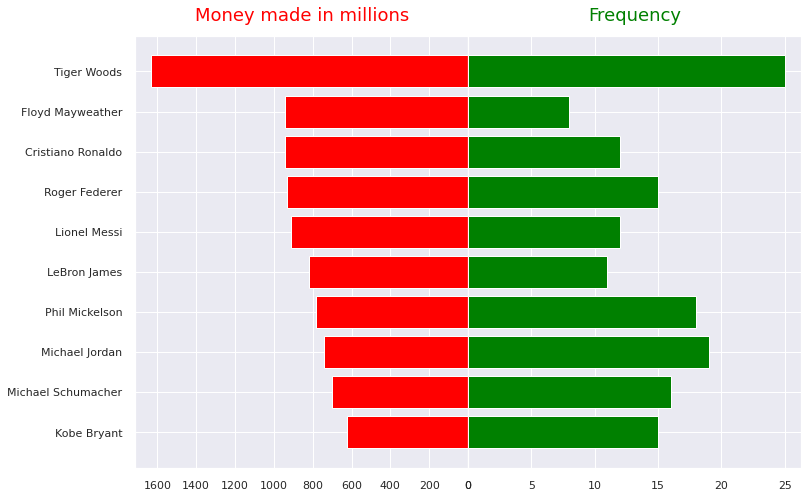

In [245]:
# Top 10 most occuring athletes
freq_athletes = df[['Name', 'Earnings']].groupby(['Name']).agg(['sum','count']).sort_values(('Earnings',   'sum'), ascending=False).head(10)

index = freq_athletes.index
column0 = freq_athletes[('Earnings',   'sum')]
column1 = freq_athletes[('Earnings',   'count')]
title0 = 'Money made in millions'
title1 = 'Frequency'

fig, axes = plt.subplots(figsize=(12,8), facecolor='white', ncols=2, sharey=True)
fig.tight_layout()

        
axes[0].barh(index, column0, align='center', color='red', zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color='red')
axes[0].invert_xaxis() 

axes[1].barh(index, column1, align='center', color='green', zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color='green')

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.gca().invert_yaxis()

    

Tiger Woods looks to be the overall chart-topper here. He's the only athlete that's crossed the 
billion $ mark, and emphatically so. It makes sense then that he also have the most features in the 
data. He's in there 25 times, while the secend best athlete regarding frequency only has around 19.

Looking at the data, frequency itself isn't the best indicator of how well an athlete my be earning
compared to others. 

A noteworthy anomaly is Floyd Mayweather. The man has the least features in the top 10 earning athletes
but has the second best earnings amount.

Michael Jordan and Phil Mickelson's numbers imply that while they featured often on the Forbes list,
they're earnings were on the lower end compared to the other athletes.  

Top 10 earning sports and frequencies

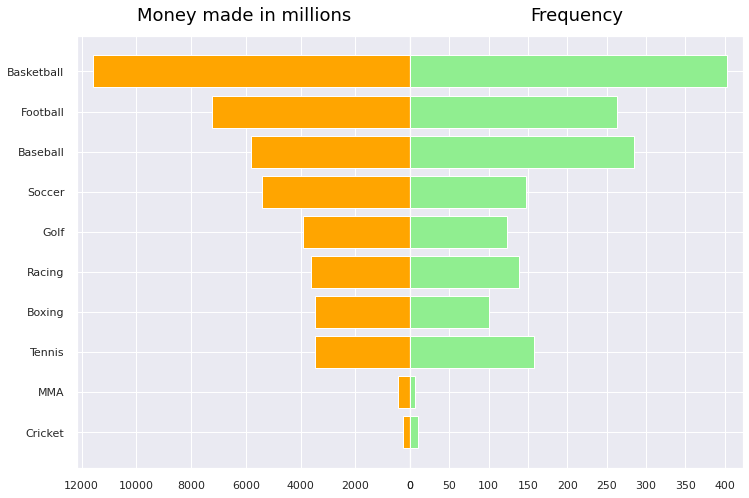

In [246]:
# Top 10 earning sports and frequencies
most_earnings_sport = df[['Earnings', 'Sport']].groupby(['Sport']).agg(['sum','count']).sort_values(('Earnings',   'sum'), ascending=False).head(10)
most_earnings_sport

index = most_earnings_sport.index
column0 = most_earnings_sport[('Earnings',   'sum')]
column1 = most_earnings_sport[('Earnings',   'count')]
title0 = 'Money made in millions'
title1 = 'Frequency'

fig, axes = plt.subplots(figsize=(12,8), facecolor='white', ncols=2, sharey=True)
fig.tight_layout()

        
axes[0].barh(index, column0, align='center', color='orange', zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color='black')
axes[0].invert_xaxis() 

axes[1].barh(index, column1, align='center', color='lightgreen', zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color='black')

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.gca().invert_yaxis()

Bakestball as an industry made just shy of $12 bilion. Basket also had the most appearances.
Second is **AMERICAN FOOTBALL** with around $7 billion raked in, It and Baseball are somewhat
neck and neck in both categories. 

,Earnings
Name,
Tiger Woods,1632.2
Floyd Mayweather,944.5
Cristiano Ronaldo,942.9
Roger Federer,933.1
Lionel Messi,911.5
LeBron James,820.5
Phil Mickelson,781.7
Michael Jordan,739.2
Michael Schumacher,703.0


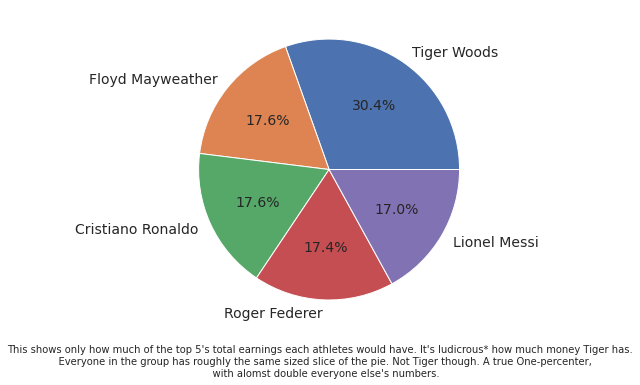

In [247]:
# Most earning athletes

most_earnings_athletes = df[['Name', 'Earnings']].groupby(['Name']).sum().sort_values(['Earnings'], ascending=False).head(10)

display(most_earnings_athletes)

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax.pie(most_earnings_athletes.Earnings[:5],
        labels=most_earnings_athletes.index.get_level_values(0)[:5],
        autopct='%1.1f%%', textprops={'fontsize': 14})

fig.set_facecolor('white')
txt = """This shows only how much of the top 5's total earnings each athletes would have. It's ludicrous* how much money Tiger has.
    Everyone in the group has roughly the same sized slice of the pie. Not Tiger though. A true One-percenter, 
    with alomst double everyone else's numbers."""
fig.text(.5, .025, txt, ha='center')

plt.show()

#### Add a table or visualization here to showing descrepency between earnings vs freq per sport

##### Who are the top earning athletes per sport

In [248]:
df2 = df[['Earnings', 'Sport', 'Name']].groupby(['Sport', 'Name']).sum()

In [249]:
df2.groupby('Sport', group_keys=False).apply(lambda x: x.sort_values('Earnings', ascending=False)).groupby(level=0).head(3)


Earnings
Sport      Name                          
Baseball   Alex Rodriguez           375.1
           Derek Jeter              306.4
           Miguel Cabrera           229.1
Basketball LeBron James             820.5
           Michael Jordan           739.2
           Kobe Bryant              621.0
Boxing     Floyd Mayweather         944.5
           Manny Pacquiao           454.8
           Mike Tyson               306.1
Cricket    Mahendra Singh Dhoni     119.0
           Virat Kohli               97.0
           Sachin Tendulkar          40.6
Cycling    Lance Armstrong           68.2
           Greg LeMond                8.5
Football   Tom Brady                317.5
           Drew Brees               300.4
           Peyton Manning           280.2
Golf       Tiger Woods             1632.2
           Phil Mickelson           781.7
           Rory McIlroy             340.9
Hockey     Wayne Gretzky             93.8
           Sergei Fedorov            29.8
           Joe Sakic                 17.9
MMA        Conor McGregor           430.0
Racing     Michael Schumacher       703.0
           Lewis Hamilton           519.5
           Fernando Alonso          327.0
Soccer     Cristiano Ronaldo        942.9
           Lionel Messi             911.5
           Neymar                   545.1
Tennis     Roger Federer            933.1
           Novak Djokovic           375.4
           Rafael Nadal             353.5
Track      Usain Bolt               186.4

In [250]:
earn_by_sport = df2.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('Earnings', ascending=False)).groupby(level=0).head(3)

In [251]:
index = list(earn_by_sport.index.get_level_values(1))
sports = list(earn_by_sport.index.get_level_values(0))
values = list(earn_by_sport.values.flatten())

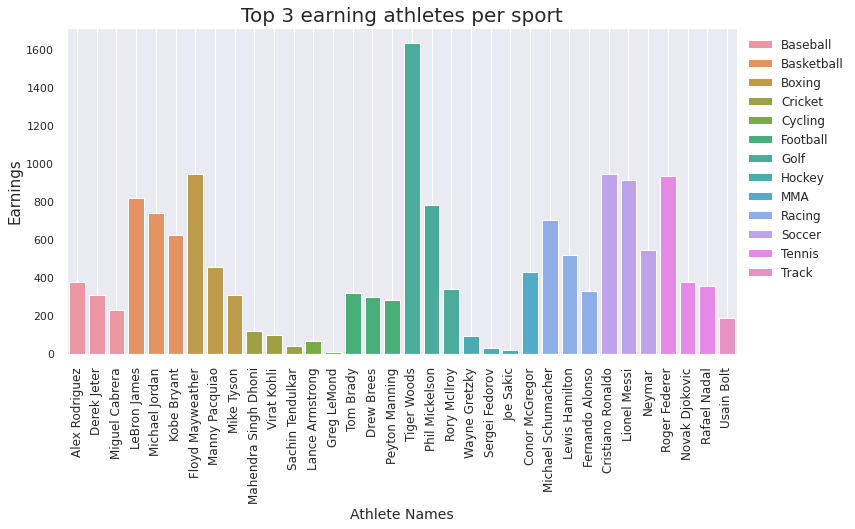

In [252]:

sns.set(rc = {'figure.figsize':(12,6)})
df3 = pd.DataFrame({'name':index, 'sport':sports, 'earnings':values})

ax = sns.barplot(x="name", y="earnings", hue="sport", data=df3, dodge=False)
ax.set_xticklabels(labels=index, rotation=90, fontdict={'size':12})
ax.set_xlabel('Athlete Names', fontdict={'size': 14})
ax.set_ylabel('Earnings', fontdict={'size': 15})

plt.title('Top 3 earning athletes per sport', font={'size': 20})
plt.legend(bbox_to_anchor=(1, 1), fontsize='medium')
plt.grid()

plt.show()

#### Which year had the highest number of athletes from the same sport, and how many were there?

In [253]:
#df[df['Year']==2009]['Sport'].value_counts()
df4 = df.groupby('Year')['Sport'].value_counts()

# example of output/result
df4.head(15)

Year  Sport     
1990  Tennis        6
      Baseball      5
      Boxing        4
      Golf          4
      Racing        4
      Basketball    3
      Cycling       1
      Football      1
      Hockey        1
      Soccer        1
1991  Tennis        9
      Basketball    7
      Racing        6
      Baseball      5
      Golf          5
Name: Sport, dtype: int64

In [254]:
year, sport = df4.idxmax()
num_of_players = df4.max()

print(f"""{year} was the year with the most occuring sport.\n
The sport was {sport}, with {num_of_players} players.""")

2018 was the year with the most occuring sport.

The sport was Basketball, with 40 players.


#### Let's see how soccer players fair against each other (also because it's my favourite sport)

In [255]:
soccer_figs = df[df['Sport']=='Soccer'][['Earnings', 'Name']].groupby('Name').sum().sort_values('Earnings', ascending=False).head(10)
soccer_figs

,Earnings
Name,
Cristiano Ronaldo,942.9
Lionel Messi,911.5
Neymar,545.1
David Beckham,408.4
Gareth Bale,228.2
Wayne Rooney,196.6
Ronaldinho,173.8
Zlatan Ibrahimovic,168.6
Sergio Aguero,159.6


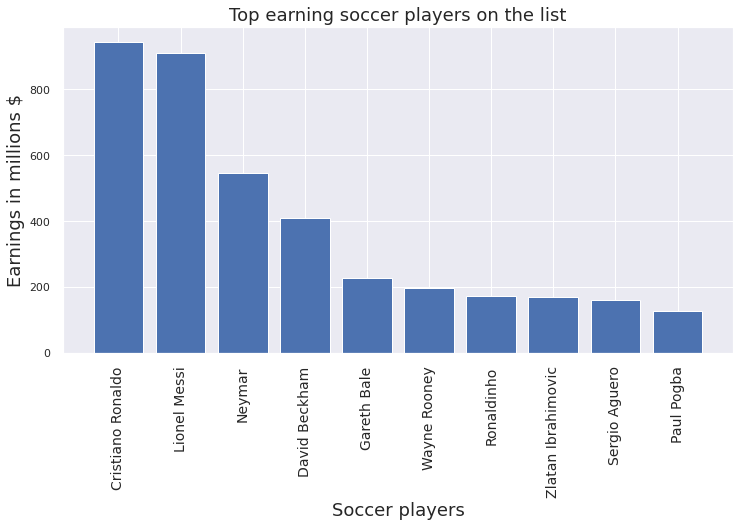

In [256]:
from itertools import chain
soccer_name = list(soccer_figs.index)
vals = list(chain.from_iterable(soccer_figs.values))

fig, ax = plt.subplots()

plt.title("Top earning soccer players on the list", fontdict={'size':18})
plt.ylabel("Earnings in millions $", fontdict={'size':18})
plt.xlabel("Soccer players", fontdict={'size':18})
plt.xticks(rotation=90, font={'size':14})
ax.bar(soccer_name, vals)
plt.rcParams["figure.figsize"] = (11, 5)



As a strong, and biased, Lionel Messi fan, it doesn't rub me right that Cristiano outperformed Messi in earnings.\
Maybe Messi may have more appearances on the list, and 1-up Ronaldo that way (Although that would mean Ronaldo made more money with fewere appearaces, which is arguably a better stat.)

In [257]:
df.loc[(df['Name']=='Cristiano Ronaldo') | (df['Name']=='Lionel Messi')]['Name'].value_counts()

Cristiano Ronaldo    12
Lionel Messi         12
Name: Name, dtype: int64

Looks like the two soccer players appear the same number of times. RATS!!

## Cheers for making it this far into the notebook!